In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
df=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.shape

(5001, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [8]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [11]:
df._get_numeric_data().columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

In [12]:
df.corr()

/tmp/ipykernel_312/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


/tmp/ipykernel_312/3470320237.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

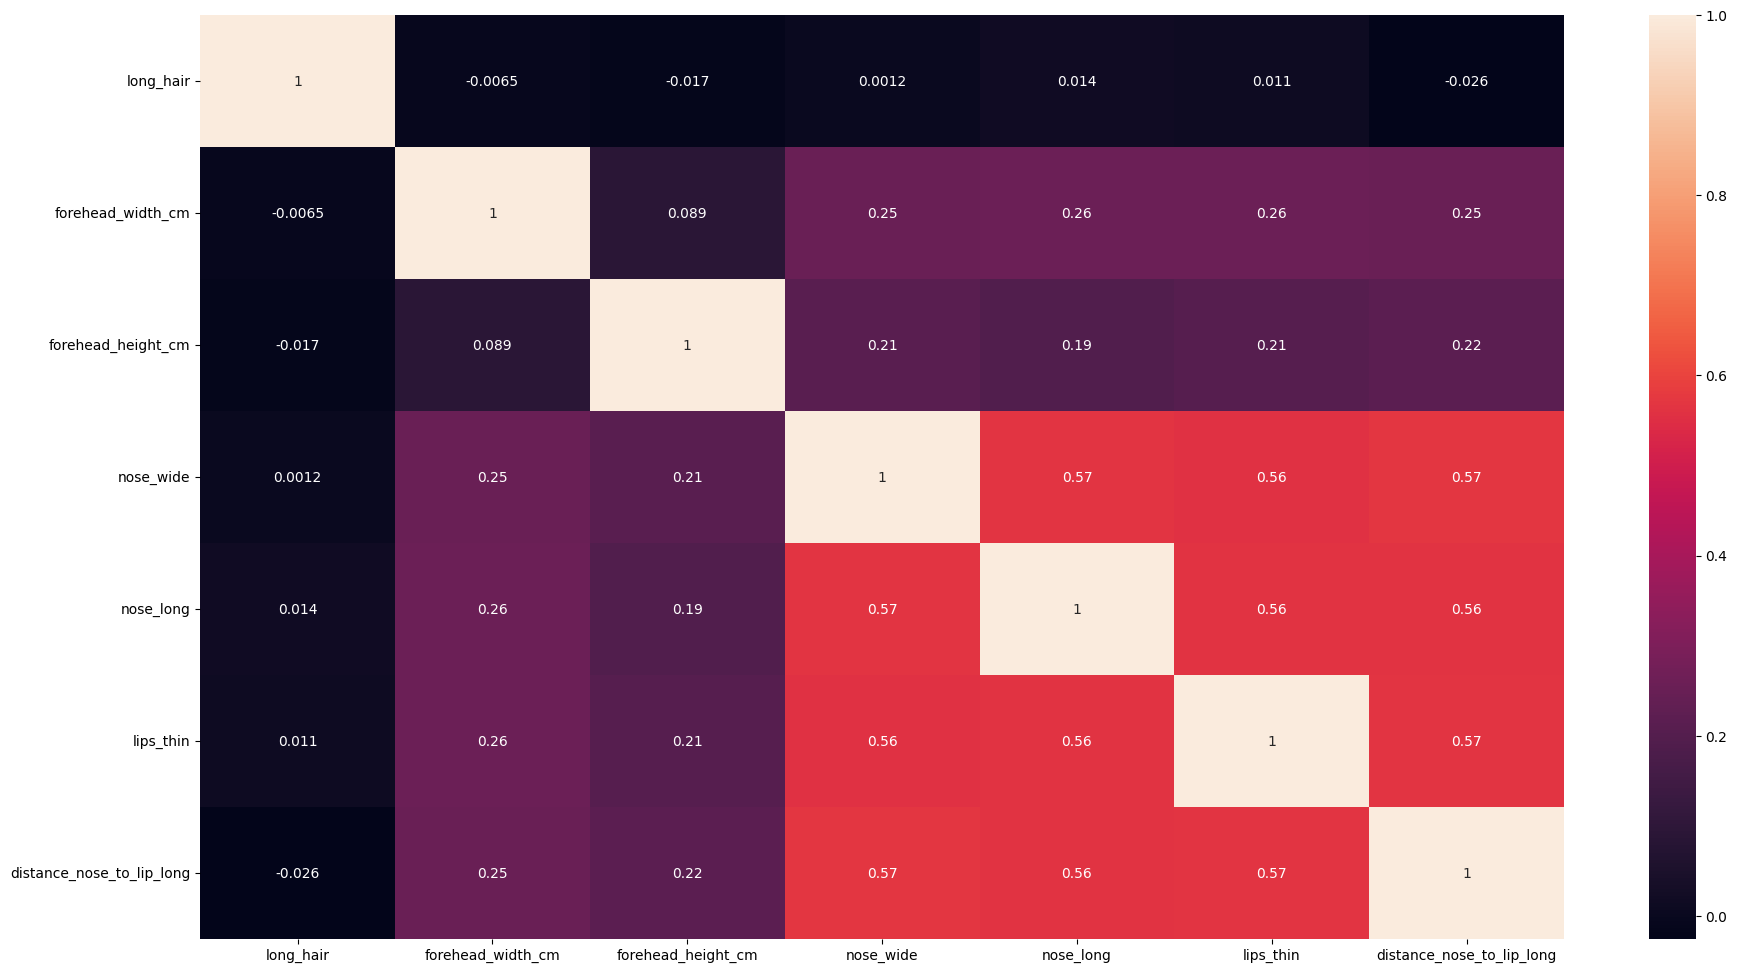

In [13]:
plt.figure(figsize=(22,12)) 
sns.heatmap(df.corr(),annot=True)

In [14]:
df['gender'].head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [15]:
numeric_gender = {"Male":0, "Female":1}
df['gender'] = df['gender'].map(numeric_gender)
Y=df['gender']
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: gender, dtype: int64

In [16]:
df.drop(columns=['gender'],inplace=True,axis=1)

In [17]:
X=df
X.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

In [18]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3350, 7)
(1651, 7)
(3350,)
(1651,)


In [22]:
from sklearn import metrics

In [23]:
from sklearn.linear_model import LinearRegression 
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred_lnr=lnr.predict(x_test) 
lnr_acc=lnr.score(x_test,y_test)
lnr_acc

0.841359466013899

In [24]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(lr.score(x_test,y_test))
lr_acc=metrics.accuracy_score(y_test,y_pred_lr)
lr_acc

0.9691096305269533


0.9691096305269533

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred_dt=clf.predict(x_test)
dt_acc=metrics.accuracy_score(y_test,y_pred_dt)
dt_acc

0.9660811629315567

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=32,random_state=42)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
rfc_acc=metrics.accuracy_score(y_test,y_pred_rfc)
rfc_acc

0.9715324046032707

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {'n_estimators': [50, 100],
              'max_depth': [5, 10],
              'min_samples_split': [2, 5],
              'max_features': [3, 5],
              'criterion': ['gini', 'entropy']}

In [29]:
rf = RandomForestClassifier(random_state=42)
gridsearch = GridSearchCV(rf, parameters)
gridsearch.fit(X, Y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': [3, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [30]:
sorted(gridsearch.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [31]:
gridsearch.cv_results_
print(gridsearch.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
print(gridsearch.best_score_)

0.9738079920079921


In [33]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier() 
knn.fit(x_train,y_train) 
y_pred_knn=knn.predict(x_test) 
knn_acc=metrics.accuracy_score(y_test,y_pred_knn)
knn_acc

0.9733494851605088

In [34]:
params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, param_grid=params, cv=5)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [35]:
print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'n_neighbors': 7, 'weights': 'uniform'}
0.9671641791044777


In [36]:
names=['Linear Regression','Logistic Regression', 'Decision Tree Classification' ,'Random Forest Classification','KNN']
acc=[lnr_acc,lr_acc,dt_acc,rfc_acc,knn_acc]

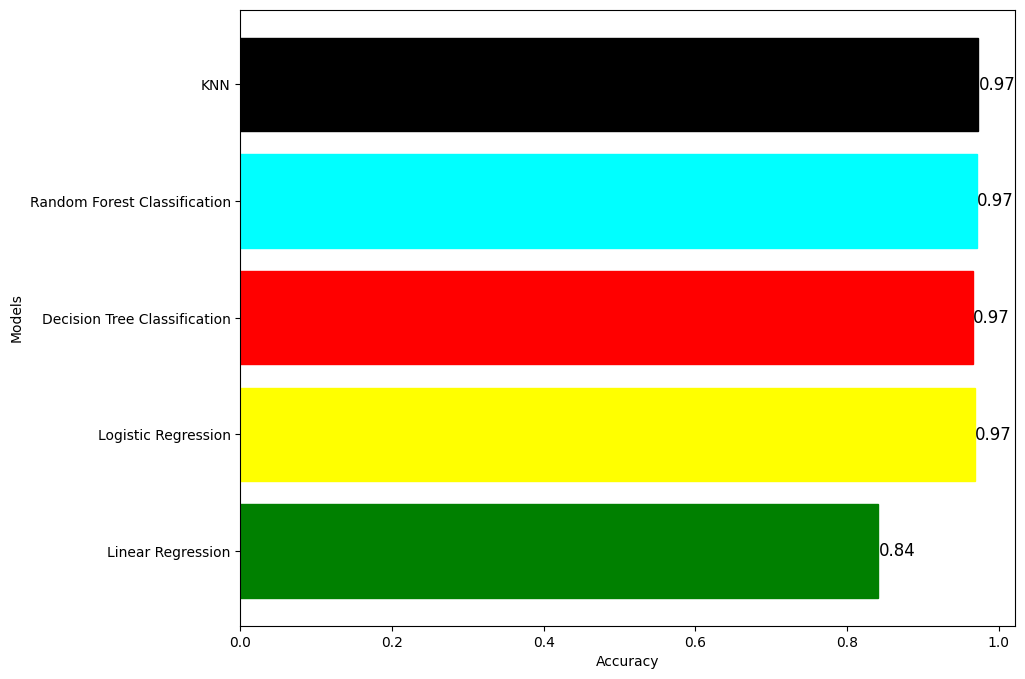

In [37]:
plt.figure(figsize=(10, 8))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('red')
graph[3].set_color('cyan')
graph[4].set_color('black')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

In [38]:
params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, param_grid=params, cv=5)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [39]:
sorted(gridsearch.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [40]:
knn_grid.cv_results_

{'mean_fit_time': array([0.00503387, 0.0046649 , 0.0047471 , 0.0046267 , 0.00477877,
        0.00519829]),
 'std_fit_time': array([2.37422608e-04, 9.92475578e-05, 2.92831596e-05, 1.01351219e-04,
        9.08742790e-05, 6.50284118e-04]),
 'mean_score_time': array([0.02424078, 0.00810456, 0.02520242, 0.00913997, 0.02594528,
        0.01170073]),
 'std_score_time': array([0.00035006, 0.00012836, 0.00019556, 0.00010781, 0.00019988,
        0.00203791]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 5, 'weights'

In [41]:
print(knn_grid.best_params_)

{'n_neighbors': 7, 'weights': 'uniform'}


In [42]:
print(knn_grid.best_score_)

0.9671641791044777


In [43]:
results = knn_grid.cv_results_
mean_test_score = results['mean_test_score']
n_neighbors = results['param_n_neighbors'].data.astype(int)
weights = results['param_weights'].data

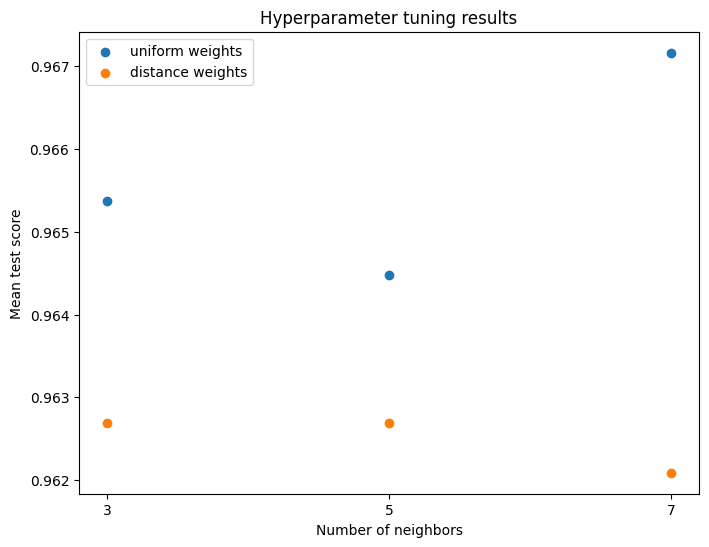

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(n_neighbors[weights=='uniform'],mean_test_score[weights=='uniform'], label='uniform weights') 
plt.scatter(n_neighbors[weights=='distance'],mean_test_score[weights=='distance'], label='distance weights') 
plt.xticks(np.unique(n_neighbors))
plt.xlabel('Number of neighbors')
plt.ylabel('Mean test score')
plt.title('Hyperparameter tuning results')
plt.legend()
plt.show()